In [11]:
%pip install numpy
%pip install matplotlib
%pip install pandas
%pip install scikit-learn
%pip install xgboost
%pip install seaborn
%pip install joypy
%pip install shap

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [12]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [13]:
dataset = pd.read_csv("divorce.csv")
dataset.head()

,Sorry_end,Ignore_diff,begin_correct,Contact,Special_time,No_home_time,2_strangers,enjoy_holiday,enjoy_travel,common_goals,...,silence_for_harm,silence_fear_anger,I'm_right,accusations,I'm_not_guilty,I'm_not_wrong,no_hesitancy_inadequate,you're_inadequate,incompetence,Divorce_Y_N
0,2,2,4,1,0,0,0,0,0,0,...,2,1,3,3,3,2,3,2,1,1
1,4,4,4,4,4,0,0,4,4,4,...,2,2,3,4,4,4,4,2,2,1
2,2,2,2,2,1,3,2,1,1,2,...,3,2,3,1,1,1,2,2,2,1
3,3,2,3,2,3,3,3,3,3,3,...,2,2,3,3,3,3,2,2,2,1
4,2,2,1,1,1,1,0,0,0,0,...,2,1,2,3,2,2,2,1,0,1


In [14]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 170 entries, 0 to 169
Data columns (total 55 columns):
 #   Column                         Non-Null Count  Dtype
---  ------                         --------------  -----
 0   Sorry_end                      170 non-null    int64
 1   Ignore_diff                    170 non-null    int64
 2   begin_correct                  170 non-null    int64
 3   Contact                        170 non-null    int64
 4   Special_time                   170 non-null    int64
 5   No_home_time                   170 non-null    int64
 6   2_strangers                    170 non-null    int64
 7   enjoy_holiday                  170 non-null    int64
 8   enjoy_travel                   170 non-null    int64
 9   common_goals                   170 non-null    int64
 10  harmony                        170 non-null    int64
 11  freeom_value                   170 non-null    int64
 12  entertain                      170 non-null    int64
 13  people_goals        

In [15]:
dataset.describe()

,Sorry_end,Ignore_diff,begin_correct,Contact,Special_time,No_home_time,2_strangers,enjoy_holiday,enjoy_travel,common_goals,...,silence_for_harm,silence_fear_anger,I'm_right,accusations,I'm_not_guilty,I'm_not_wrong,no_hesitancy_inadequate,you're_inadequate,incompetence,Divorce_Y_N
count,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,...,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000
mean,1.776471,1.652941,1.764706,1.482353,1.541176,0.747059,0.494118,1.452941,1.458824,1.576471,...,2.552941,2.270588,2.741176,2.382353,2.429412,2.476471,2.517647,2.241176,2.011765,0.494118
std,1.627257,1.468654,1.415444,1.504327,1.632169,0.904046,0.898698,1.546371,1.557976,1.421529,...,1.371786,1.586841,1.137348,1.511587,1.405090,1.260238,1.476537,1.505634,1.667611,0.501442
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,2.000000,1.000000,2.000000,1.000000,1.000000,2.000000,1.000000,1.000000,0.000000,0.000000
50%,2.000000,2.000000,2.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,2.000000,...,3.000000,2.000000,3.000000,3.000000,2.000000,3.000000,3.000000,2.000000,2.000000,0.000000
75%,3.000000,3.000000,3.000000,3.000000,3.000000,1.000000,1.000000,3.000000,3.000000,3.000000,...,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,1.000000
max,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,...,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,1.000000


In [16]:
dataset.isnull().any().sum()

0

In [17]:
dataset['Divorce_Y_N'].value_counts()

Divorce_Y_N
0    86
1    84
Name: count, dtype: int64

In [82]:
divorce_data = dataset[dataset['Divorce_Y_N'] == 0]
features = divorce_data.drop(columns=['Sorry_end', 'No_home_time', '2_strangers', 'Aggro_argue', 'Always_never',
    'negative_personality', 'offensive_expressions', 'insult', 'humiliate',
    'not_calm', 'hate_subjects', 'sudden_discussion', 'idk_what\'s_going_on',
    'calm_breaks', 'argue_then_leave', 'silent_for_calm', 'good_to_leave_home',
    'silence_instead_of_discussion', 'silence_for_harm', 'silence_fear_anger','Divorce_Y_N']).mean()
top_8_features_positive = features.sort_values(ascending=False).head(8)
print(top_8_features_positive)

I'm_right                  2.046512
I'm_not_wrong              1.616279
no_hesitancy_inadequate    1.569767
I'm_not_guilty             1.383721
accusations                1.279070
you're_inadequate          1.186047
incompetence               0.686047
begin_correct              0.639535
dtype: float64


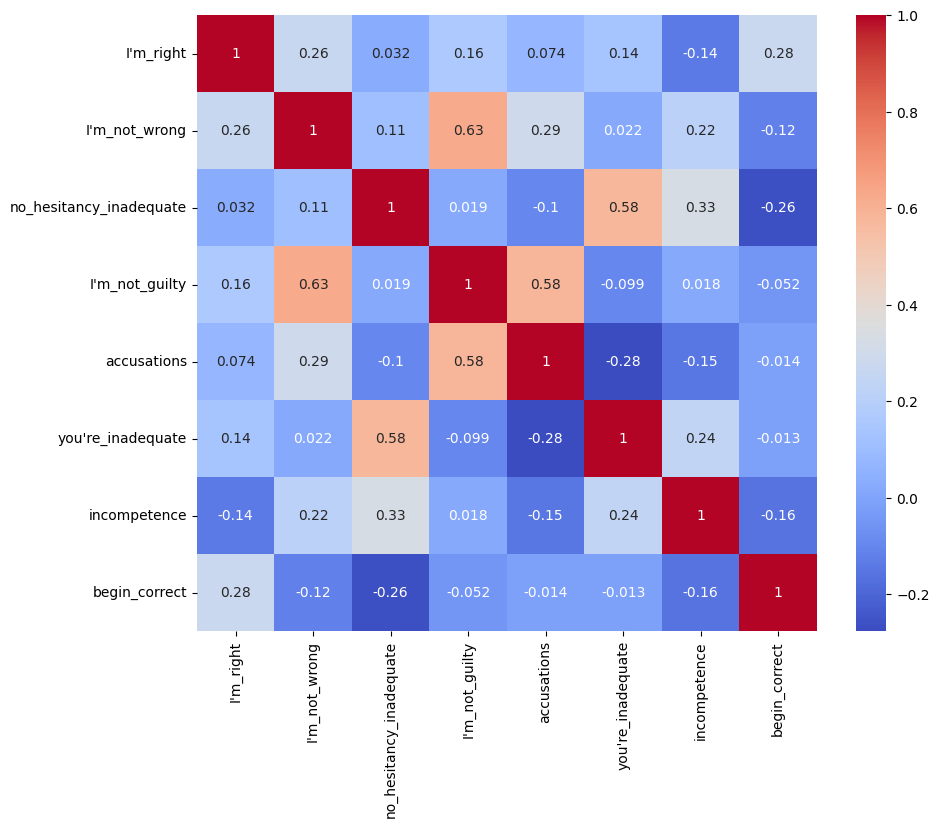

In [83]:
data = divorce_data[top_8_features_positive.index]
plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.show()

In [85]:
divorce_data = dataset[dataset['Divorce_Y_N'] == 1]

negative_features = divorce_data[['Sorry_end', 'No_home_time', '2_strangers', 'Aggro_argue', 'Always_never',
                                  'negative_personality', 'offensive_expressions', 'insult', 'humiliate',
                                  'not_calm', 'hate_subjects', 'sudden_discussion', "idk_what's_going_on",
                                  'calm_breaks', 'argue_then_leave', 'silent_for_calm', 'good_to_leave_home',
                                  'silence_instead_of_discussion', 'silence_for_harm', 'silence_fear_anger']]

mean_values = negative_features.mean()

top_8_features_negative = mean_values.sort_values(ascending=False).head(8)
print(top_8_features_negative)


sudden_discussion      3.642857
not_calm               3.583333
idk_what's_going_on    3.571429
calm_breaks            3.547619
silent_for_calm        3.476190
Aggro_argue            3.440476
Always_never           3.416667
hate_subjects          3.404762
dtype: float64


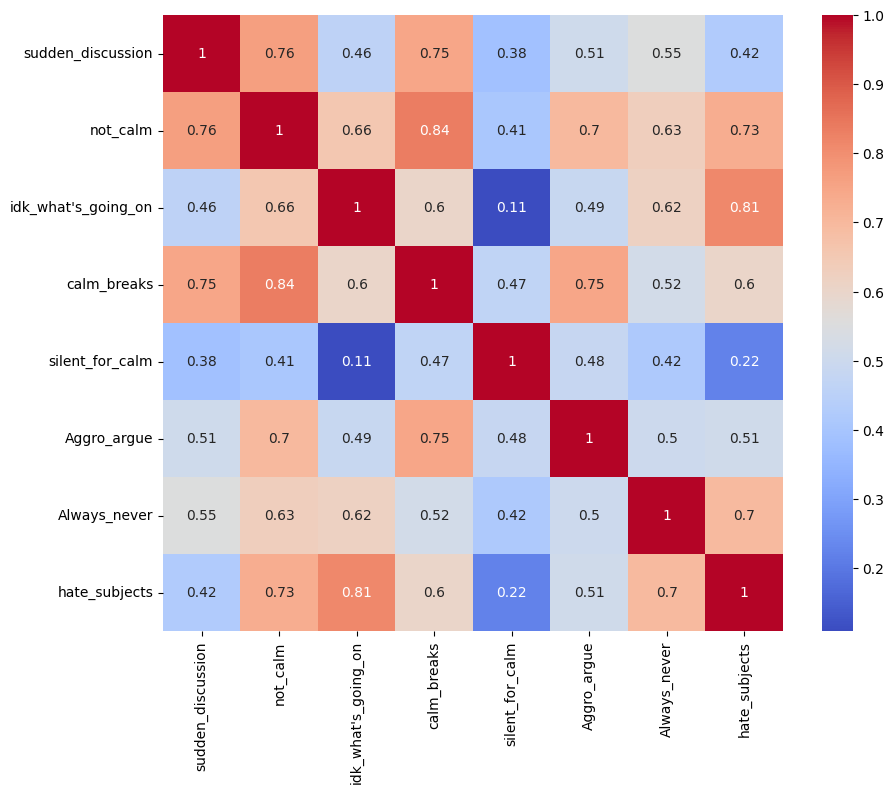

In [86]:
data = divorce_data[top_8_features_negative.index]
plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.show()

In [20]:
x = dataset.drop(['Divorce_Y_N'], axis=1)

y = dataset['Divorce_Y_N']

In [21]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [4, 11])], remainder='passthrough')
X_frame = np.array(ct.fit_transform(x))

In [22]:
print(pd.DataFrame(X_frame))

      0    1    2    3    4    5    6    7    8    9   ...   52   53   54  \
0    1.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  ...  3.0  2.0  1.0   
1    0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  1.0  0.0  ...  2.0  2.0  2.0   
2    0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  ...  2.0  3.0  2.0   
3    0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  1.0  0.0  ...  3.0  2.0  2.0   
4    0.0  1.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  ...  2.0  2.0  1.0   
..   ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
165  1.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  ...  0.0  1.0  0.0   
166  1.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  ...  3.0  4.0  1.0   
167  1.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  ...  2.0  3.0  0.0   
168  1.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  ...  4.0  3.0  3.0   
169  1.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  ...  1.0  3.0  4.0   

      55   56   57   58   59   60   61  
0    3.0  3.0  3.0  2.0  3.0  2.0 

In [23]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_frame, y, test_size=0.2, random_state=42)


In [24]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, fbeta_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import numpy as np

def model_tester(classifier, X_train, y_train, parameters=[]):
    scorer = make_scorer(fbeta_score, beta=0.5)
    grid_search = GridSearchCV(estimator=classifier,
                               param_grid=parameters,
                               scoring=scorer,
                               cv=10,
                               n_jobs=-1)
    grid_search.fit(X_train, y_train)
    best_accuracy = grid_search.best_score_
    best_parameters = grid_search.best_params_
    std_dev = grid_search.cv_results_['std_test_score'][grid_search.best_index_]

    print("Best F0.5: {:.2f} %".format(best_accuracy * 100))
    print("Standard Deviation of Best Score: {:.2f} %".format(std_dev * 100))
    print("Best Parameters:", best_parameters)
    return grid_search

classifier = LogisticRegression()
lr = model_tester(classifier, X_train, y_train, [{'C': [0.25, 0.5, 0.75, 1], 'max_iter': [100, 200, 300, 400, 500]}])


Best F0.5: 98.97 %
Standard Deviation of Best Score: 1.58 %
Best Parameters: {'C': 0.25, 'max_iter': 100}


In [25]:
model = LogisticRegression()
model.fit(x,y)
prediction_data = [[0,2,2,1,0,0,0,0,0,2,1,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,3,0,0,0,0,2,1,0,2,0,0,0,0,0,0,0,3,1,1,1,0,3,0]]
X_pred = prediction_data
prediction_result = model.predict(X_pred)
if prediction_result[0] == 1:
    print("Prediction Result: Divorce")
else:
    print("Prediction Result: Not Divorce")

Prediction Result: Not Divorce


c:\Users\USER\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
